# Conv-adapter (residual) experiments with and without batchnorm

In [2]:
import sync_wandb_run
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import utils as pu


In [3]:
entity = "raphaelmaser"  # Your W&B username or team
project = "Improved-Interpretability-and-Concepts"  # Your W&B project name
df = sync_wandb_run.load_wandb_runs()
df.count()  # Display the number of runs loaded
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

val_accuracy = "Validation Accuracy"
grid_score = "PG Score"
frozen_layers = "config_define_frozen_layers"
trainable_layers = "Trainable (B=2) Layers"
figsize=(10,4)


In [4]:
def rename_model_names(df):
    """Rename model names in the DataFrame for better readability."""
    df = df.replace({
        "name": {
            "B=1_pretrained_CE_bcosified": "B=2 (Bcosified Model)",
            "B=1_pretrained_CE-parallel-residual-adapters-B=2_B=2": "B=2 Model with B=2 Adapter",
            "B=1_pretrained_CE-parallel-residual-adapters-B=2_B=1": "B=2 Model with B=1 Adapter",
            "B=1_pretrained_CE-parallel-residual-adapters-B=1_B=2": "B=1 Model with B=2 Adapter",
            "B=1_pretrained_CE-parallel-residual-adapters-B=1_B=1": "B=1 Model with B=1 Adapter",
        }
    })
    return df

## Without batchnorm

In [5]:
conv_wo_batchnorm = df[df['group'] == "adapter-experiments"]
conv_wo_batchnorm = conv_wo_batchnorm[conv_wo_batchnorm["id"].isin(["sbpfkwct", "dv8y7o8k", "yheexwdv", "zf9oo2l6", "xka2n8rp"])]  # Filter for specific runs
conv_wo_batchnorm = rename_model_names(conv_wo_batchnorm)  # Rename model names for better readability
conv_wo_batchnorm.reset_index(drop=True, inplace=True)  # Reset index after filtering
print(f"Number of runs in layerwise_freezing group: {len(conv_wo_batchnorm)}")
conv_wo_batchnorm.head()
for name in conv_wo_batchnorm["name"].unique(): print(name)  # Print each model name

#Renaming
conv_wo_batchnorm = pu.rename(conv_wo_batchnorm).sort_values(by=val_accuracy, ascending=False)
conv_wo_batchnorm = pu.add_trainable_layers_column(conv_wo_batchnorm, frozen_layers_col=frozen_layers, new_col_name=trainable_layers)
display(conv_wo_batchnorm)


Number of runs in layerwise_freezing group: 5
B=2 Model with B=2 Adapter
B=2 (Bcosified Model)
B=1 Model with B=1 Adapter
B=1 Model with B=2 Adapter
B=2 Model with B=1 Adapter


id                       Model     state        entity  \
2  dv8y7o8k  B=1 Model with B=1 Adapter  finished  raphaelmaser   
4  zf9oo2l6  B=2 Model with B=1 Adapter  finished  raphaelmaser   
1  sbpfkwct       B=2 (Bcosified Model)  finished  raphaelmaser   
3  yheexwdv  B=1 Model with B=2 Adapter  finished  raphaelmaser   
0  xka2n8rp  B=2 Model with B=2 Adapter  finished  raphaelmaser   

                                  project            created_at  updated_at  \
2  Improved-Interpretability-and-Concepts  2025-06-29T21:32:32Z         NaN   
4  Improved-Interpretability-and-Concepts  2025-06-29T21:32:32Z         NaN   
1  Improved-Interpretability-and-Concepts  2025-06-29T21:32:34Z         NaN   
3  Improved-Interpretability-and-Concepts  2025-06-29T21:32:35Z         NaN   
0  Improved-Interpretability-and-Concepts  2025-06-29T21:32:35Z         NaN   

  tags notes                                                url  \
2  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
4  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
1  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
3  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
0  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   

                 group  job_type  sweep                   synced_at  config_b  \
2  adapter-experiments       NaN    NaN  2025-07-27T10:45:27.691858       1.0   
4  adapter-experiments       NaN    NaN  2025-07-27T10:45:26.742426       1.0   
1  adapter-experiments       NaN    NaN  2025-07-27T10:45:28.550210       2.0   
3  adapter-experiments       NaN    NaN  2025-07-27T10:45:30.268521       2.0   
0  adapter-experiments       NaN    NaN  2025-07-27T10:45:29.438695       2.0   

   config_lr config_loss  config_seed config_tags         config_group  \
2      0.001  UniformBCE         42.0         NaN  adapter-experiments   
4      0.001  UniformBCE         42.0         NaN  adapter-experiments   
1      0.001  UniformBCE         42.0         NaN  adapter-experiments   
3      0.001  UniformBCE         42.0         NaN  adapter-experiments   
0      0.001  UniformBCE         42.0         NaN  adapter-experiments   

              config_model  config_epochs config_adapter  config_compile  \
2  BcosResNet50_bottleneck             30            NaN            True   
4  BcosResNet50_bottleneck             30            NaN            True   
1  BcosResNet50_bottleneck             30            NaN            True   
3  BcosResNet50_bottleneck             30            NaN            True   
0  BcosResNet50_bottleneck             30            NaN            True   

  config_dataset  config_vit_dim config_use_lora config_act_layer  \
2   TinyImagenet             NaN             NaN             relu   
4   TinyImagenet             NaN             NaN             relu   
1   TinyImagenet             NaN             NaN             relu   
3   TinyImagenet             NaN             NaN             relu   
0   TinyImagenet             NaN             NaN             relu   

   config_b_adapter                                   config_data_path  \
2               2.0  /home/rmaser/rmaser_improved_interpretability_...   
4               2.0  /home/rmaser/rmaser_improved_interpretability_...   
1               2.0  /home/rmaser/rmaser_improved_interpretability_...   
3               2.0  /home/rmaser/rmaser_improved_interpretability_...   
0               2.0  /home/rmaser/rmaser_improved_interpretability_...   

  config_precision  config_vit_depth  config_vit_qkv_b  config_batch_size  \
2       bf16-mixed               NaN               NaN                256   
4       bf16-mixed               NaN               NaN                256   
1       bf16-mixed               NaN               NaN                256   
3       bf16-mixed               NaN               NaN                256   
0       bf16-mixed               NaN               NaN                256   

  config_cache_d

<Figure size 640x480 with 0 Axes>

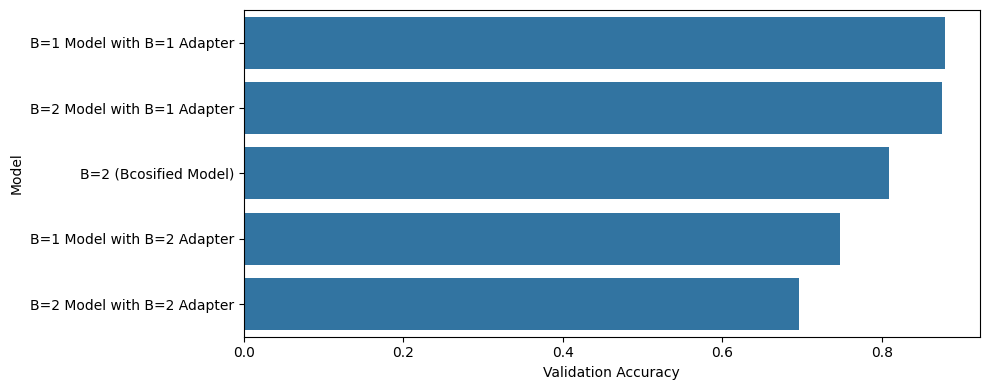

In [13]:
# Move legend outside the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=figsize)
ax = sns.barplot(
    data=conv_wo_batchnorm,
    y="Model",
    x=val_accuracy,
    # hue="Model",  # Color points by name
    # s=100  # Make points larger
)
# Move legend outside the plot
plt.tight_layout()
plt.show()

In [7]:
# # Move legend outside the plot
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=figsize)
# ax = sns.barplot(
#     data=conv_wo_batchnorm,
#     y="Model",
#     x=grid_score,
#     # hue="Model",  # Color points by name
#     # s=100  # Make points larger
# )
# pu.add_val_to_plot(ax)

# # Move legend outside the plot
# plt.tight_layout()
# plt.show()

## With trainable batchnorm

In [8]:
conv_adapters = df[df['group'] == "adapter-experiments-v2"]
#conv_w_batchnorm = conv_w_batchnorm[conv_w_batchnorm["id"].isin(["29kcufiq", "rckc8zpm", "zhbset75", "rcwnxfzd", "mj4pynlw"])]  # Filter for specific 29kcufiq  # Filter for specific runs
conv_adapters = rename_model_names(conv_adapters)  # Rename model names for better readability
conv_adapters.reset_index(drop=True, inplace=True)  # Reset index after filtering
bcosified_model = df[df["id"] == "oi7q6r2p"]
conv_adapters = pd.concat([bcosified_model, conv_adapters], ignore_index=True)  # Add Bcosified Model to the DataFrame
print(f"Number of runs in layerwise_freezing group: {len(conv_adapters)}")
conv_adapters.head()
for name in conv_adapters["name"].unique(): print(name)  # Print each model name

#Renaming
conv_adapters = pu.rename(conv_adapters).sort_values(by=val_accuracy, ascending=False)
conv_adapters = pu.add_trainable_layers_column(conv_adapters, frozen_layers_col=frozen_layers, new_col_name=trainable_layers)
display(conv_adapters)


Number of runs in layerwise_freezing group: 10
B=1_pretrained_CE_bcosified
B=2 Model with B=2 Adapter
B=1 Model with B=2 Adapter
B=2 (Bcosified Model)
B=2 Model with B=1 Adapter
B=1 Model with B=1 Adapter


id                        Model     state        entity  \
5  o1qtrrri   B=2 Model with B=1 Adapter  finished  raphaelmaser   
0  oi7q6r2p  B=1_pretrained_CE_bcosified  finished  raphaelmaser   
4  oi7q6r2p        B=2 (Bcosified Model)  finished  raphaelmaser   
6  u8styuye   B=1 Model with B=1 Adapter  finished  raphaelmaser   
9  seq8jfyl   B=1 Model with B=1 Adapter  finished  raphaelmaser   
7  xzlk9371   B=1 Model with B=2 Adapter  finished  raphaelmaser   
8  9sctujh0   B=2 Model with B=1 Adapter  finished  raphaelmaser   
1  u5zwu49k   B=2 Model with B=2 Adapter  finished  raphaelmaser   
2  vm6y3jah   B=1 Model with B=2 Adapter  finished  raphaelmaser   
3  fowbfxnt   B=2 Model with B=2 Adapter  finished  raphaelmaser   

                                  project            created_at  updated_at  \
5  Improved-Interpretability-and-Concepts  2025-07-23T13:25:02Z         NaN   
0  Improved-Interpretability-and-Concepts  2025-07-23T16:21:11Z         NaN   
4  Improved-Interpretability-and-Concepts  2025-07-23T16:21:11Z         NaN   
6  Improved-Interpretability-and-Concepts  2025-07-23T12:33:19Z         NaN   
9  Improved-Interpretability-and-Concepts  2025-07-24T14:08:00Z         NaN   
7  Improved-Interpretability-and-Concepts  2025-07-23T14:40:49Z         NaN   
8  Improved-Interpretability-and-Concepts  2025-07-24T14:08:04Z         NaN   
1  Improved-Interpretability-and-Concepts  2025-07-23T16:21:11Z         NaN   
2  Improved-Interpretability-and-Concepts  2025-07-24T14:09:28Z         NaN   
3  Improved-Interpretability-and-Concepts  2025-07-24T14:09:34Z         NaN   

  tags notes                                                url  \
5  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
0  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
4  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
6  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
9  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
7  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
8  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
1  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
2  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
3  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   

                    group  job_type  sweep                   synced_at  \
5  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:14.442135   
0  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:16.072896   
4  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:16.072896   
6  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:13.613884   
9  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:34.550794   
7  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:15.274904   
8  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:35.293040   
1  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:16.847486   
2  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:36.162316   
3  adapter-experiments-v2       NaN    NaN  2025-07-27T10:50:37.041727   

   config_b  config_lr config_loss  config_seed config_tags  \
5       1.0      0.001  UniformBCE         42.0         NaN   
0       2.0      0.001  UniformBCE         42.0         NaN   
4       2.0      0.001  UniformBCE         42.0         NaN   
6       1.0      0.001  UniformBCE         42.0         NaN   
9       1.0      0.001  UniformBCE         42.0         NaN   
7       2.0      0.001  UniformBCE         42.0         NaN   
8       1.0      0.001  UniformBCE         42.0         NaN   
1       2.0      0.001  UniformBCE         42.0         NaN   
2       2.0      0.001  UniformBCE         42.0         NaN   
3       2.0      0.001  UniformBCE         42.0         NaN   

             config_group             config_model  config_epochs  \
5  adapter-experiments-v2  BcosResNet50_bottleneck             30   
0  ad

In [9]:
base = conv_adapters[conv_adapters["id"] == "oi7q6r2p"]
conv_adapters_w_batchnorm = conv_adapters[conv_adapters["config_set_pretrained_batchnorms_to_eval"] == False]
conv_adapters_w_batchnorm = pd.concat([base, conv_adapters_w_batchnorm], ignore_index=True).sort_values(val_accuracy, ascending=False)  # Add Bcosified Model to the DataFrame
conv_adapters_wo_batchnorm = conv_adapters[conv_adapters["config_set_pretrained_batchnorms_to_eval"] == True]
conv_adapters_wo_batchnorm = pd.concat([base, conv_adapters_wo_batchnorm], ignore_index=True).sort_values(val_accuracy, ascending=False)  # Add Bcosified Model to the DataFrame

<Figure size 640x480 with 0 Axes>

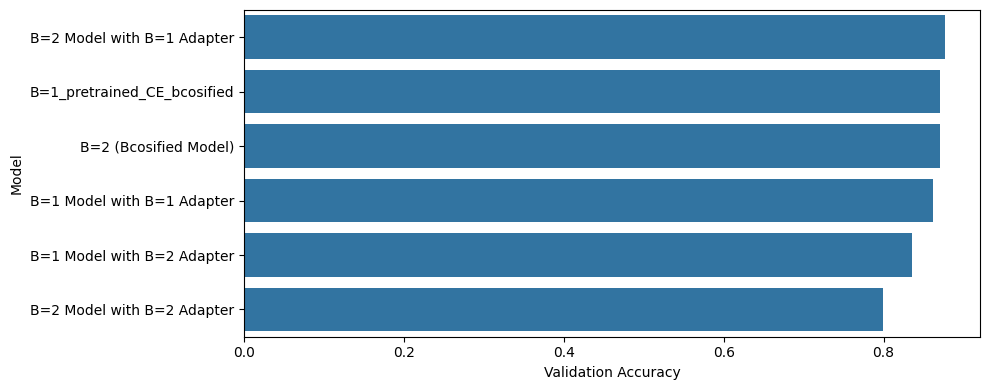

In [10]:
# Move legend outside the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=figsize)
ax = sns.barplot(
    data=conv_adapters_w_batchnorm,
    y="Model",
    x=val_accuracy,
    # hue="Model",  # Color points by name
    # s=100  # Make points larger
)
# Move legend outside the plot
plt.tight_layout()
plt.show()

In [11]:
# Move legend outside the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=figsize)
ax = sns.barplot(
    data=conv_adapters_wo_batchnorm,
    y="Model",
    x=val_accuracy,
    # hue="Model",  # Color points by name
    # s=100  # Make points larger
)

# Move legend outside the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>